# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Session-1b:)
- [code for plots](#Code-for-plots)

# Session 11:
## Machine learning introduction

*Andreas Bjerre-Nielsen*

## Taking stock

*What have we learned until now?*
- 
- 
- 

## Some coding advice

- *How do I extract an object from my function?* Print or return?
- Solving complex problems: One thing at a time
- Is joining datasets difficult? 
    - Check out [the pandas documentation on merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
    - Or [the guide available from Jake Van der Plas](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html)

## Agenda

1. [Math and stats review](#Math-review)
1. [Why machine learing](#Why-machine-learning)
1. [What is machine learning](#Machine-learning-overview)
1. Classification models
    1. [the perceptron](#The-perceptron-model)
    1. [beyond the perceptron](#Beyond-the-perceptron)

## Math review

Vector: 1-d dimensional array of numbers 
\begin{align}\boldsymbol{x}=[x_0,x_1,x_2,..]\end{align}

<br>

Matrix: 2-d dimensional array of numbers 
\begin{eqnarray}\boldsymbol{X}=[
[&x_{00}&,x_{01}&,x_{02}&,..&],\\
[&x_{10}&,x_{11}&,x_{12}&,..&],\\
[&x_{20}&,x_{21}&,x_{22}&,..&],\\
[&...   &,...   &,...   &,..&]]
\end{eqnarray}


## Function fitting
*What does (supervised) machine learning do?*

Suppose we have some data $y$ we want to model/predict from input $x$.  

The aim is to find a function $f$ such that the distance between actual values $y$ and predicted values $f(x)$ are minimized.

*What are some Examples?*

- Linear form: $y=x\beta$.
- Logistic form: $y=g(x\beta)$

where $x^T\beta=\beta_0+x_1\beta_1+x_2\beta_2+...+x_n\beta_n$ (vector dot product)

# Why machine learning

## Value of modelling 
*Why are models useful?*

Models are pursued with differens aims. Suppose we have a linear model, $y=x\beta+\epsilon$.

- Social science:
    - They teach us something about the world.
    - We want to estimate $\hat{\beta}$ and distribution
- Data science:
    - To make optimal future decisions and precise predictions, i.e. $\hat{y}$.    

## Model fragility (1)
*What is a polynomial regression?*

- Fitting a curve with an *n-dimenstional polynomial*
- Can fit any "regular" curve ~ Taylor Series Approximation.

## Model fragility (2)
*Suppose we build models of the size of the Danish population, how do polynomial fits perform?*
- We estimate model with data from 1769-1975.

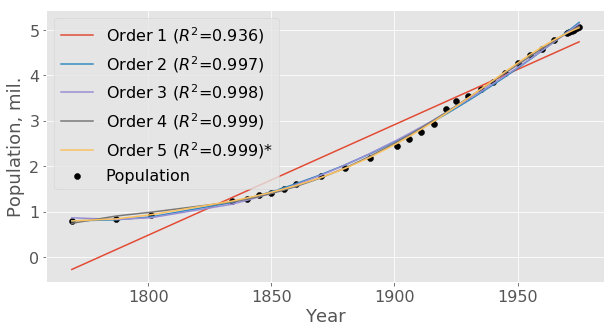

In [25]:
f_pop1

## Model fragility (3)
*Which model performs best when we extend the forecasting period from 1975 to now?*

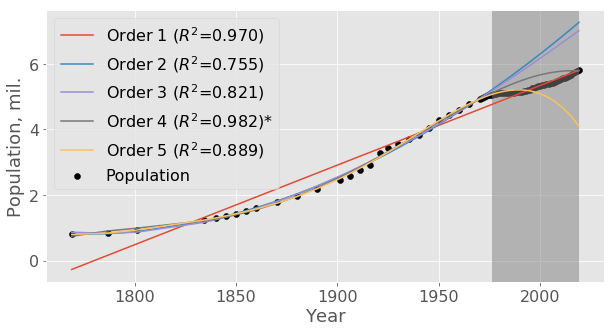

In [26]:
f_pop2

## Model fragility (4)
*What happens if we extend the prediction period until 2050? See the fifth order.*

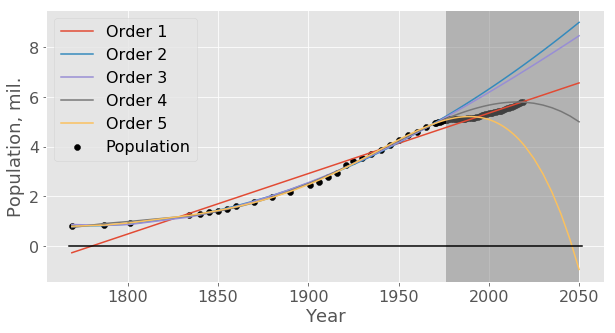

In [27]:
f_pop3

## Model fragility (5)
*What trade off do we face in modelling?*

- Making a model that is too simple and does not capture enough of data (`underfitting`)
- Making a model with great fit on estimation data, but poor out-of-sample prediction (`overfitting`)

The goal of machine learning is to find models that minimize these two problems simultaneously.

## Learning ML

- During lectures copy code for see what it does - ***listen*** to me. Write own notes.
- After lecture > understand code details
- Learn with your group - VERY IMPORTANT!

# Machine learning overview

## Machine learning outline for this course 

ML: short for machine learning

- Problems: ***supervised*** vs unsupervised
- Linear supervised ML models 
    - classification and regression
    - regularization 
    - **getting hands dirty with implementing solver**
- Fundamental concepts of ML
    - overfitting, underfitting, model validation
    - model selection and hyperparameters
- Emphasize differences and synergies between ML and statistics
- Brief intro of non-linear models

## What is machine learning
*Can you define machine learning, i.e. ML?*

- Supervised learning
  - Models designed to infer a relationship between input and **labeled** data.      
  - We define the `target` as labels in data we wish to model. 
      - Example: population as a function of year. 
- Unsupervised learning
  - Find patterns and relationships from **unlabeled** data. 
  - This may involve clustering, dimensionality reduction and more.  
  - Not part of the course.

## Why machine learning 
*How might this be useful for social scientists?*

Supervised machine learning is important (elaborated in Lecture 14):
- Improve estimation by validating models (not only theory)
- We can generate new data (impute missing)
- Better predictive models 
- Use in hybrid models that leverage machine learning for causal estimation 
    - (e.g. causal forest, neural instrumentation)

## Supervised ML problems 
*How can we categorize a supervised ML model?*

Suppose we have model $y=g(X\beta)$

We distinguish by type of the `target` variable `y`:
- **regression**: predict a numeric value
- **classification**: distinguish between target categories (non-numeric data)

## Supervised ML problems (2)
*Which one is classification, which one is regression?*

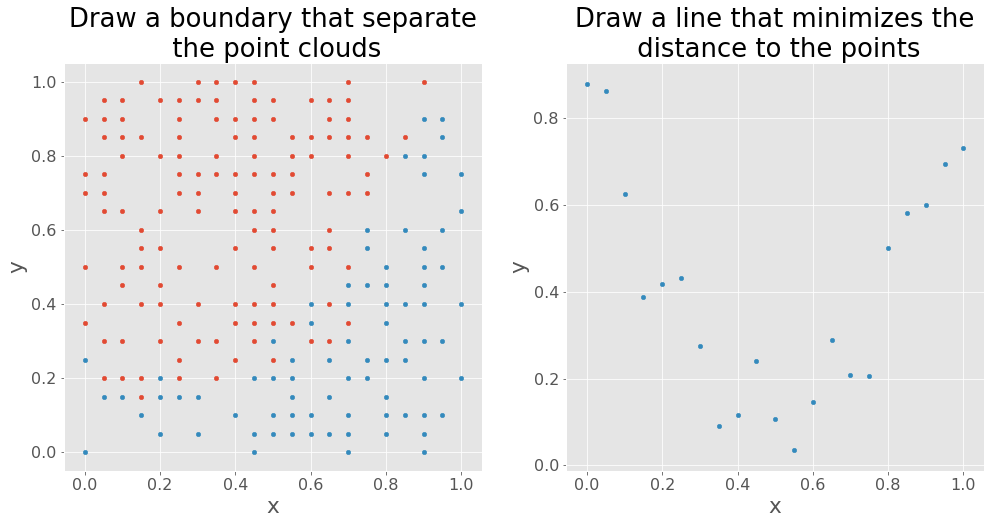

In [28]:
f_identify_question

## Supervised ML problems (3)

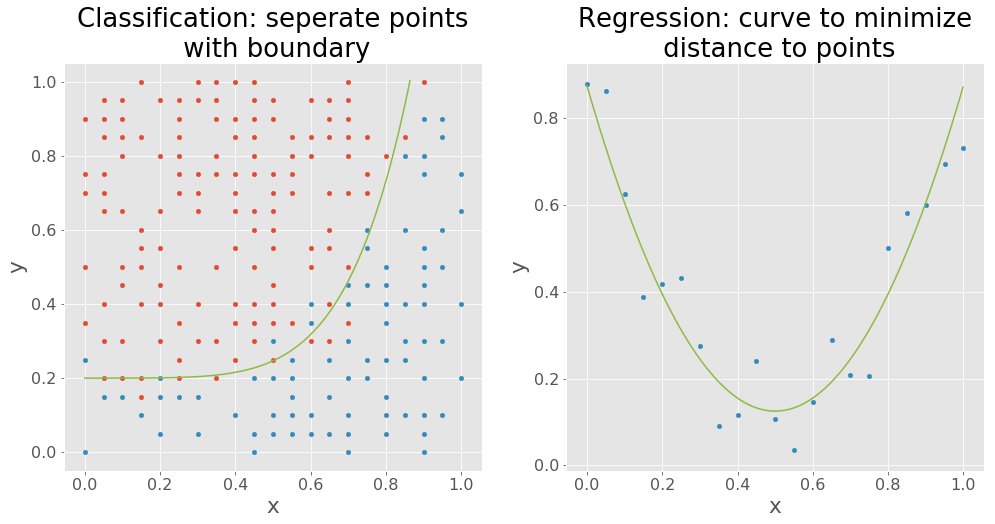

In [29]:
f_identify_answer

## Regression models
*What are examples of regressions models?*

- Example of targets: income, life expectancy, education length (years)

*What is the underlying data of the target, $y$?*

- target is `continuous` 

## Classications models
*What are examples of classication models?*

*What is the underlying data of the target, $y$?*

- Targets are categories 
  - sometimes known as `factor` in statistics 
  - (work for `str`, `bool`,  `int`, `float` which are then interpreted as categories)
- Examples of target: kind of education (linguistics, math), mode of transportation

## Example of supervised ML
*Classification or regression?*

We load the titanic data. We select variables and make dummy variables from categorical. We split into target and features. 

Target is: ...?

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
cols = ['survived','class', 'sex', 'sibsp', 'age', 'alone']
titanic_sub = pd.get_dummies(titanic[cols].dropna(), drop_first=True).astype(np.int64)  

X = titanic_sub.drop('survived', axis=1)
y = titanic_sub.survived

## Definitions

ML lingo and econometric equivalents

- `feature` vector, $\textbf{x}_i$, i.e a row of input variables
  - = explanatory **variables** in econometrics
- `weight` vector, $\textbf{w}$, i.e model parameters
  - = **coefficients** in econometrics where denoted $\beta$
- `bias` term, $w_0$, i.e. the model intercept
  - = the **constant** variable in denoted $\beta_0$
  

# The perceptron model 

## The articifial neuron

A real neuron maps stimulus (input) to output. 

[Research estimates](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5063692) there are 55–70 billion neurons in the brain.
<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_01.png' alt="Drawing" style="width: 600px;"/></center>


## The articifial neuron (2)
We are interested in making a decision rule that takes arbitrary input and outputs either positive or negative. 

Mathematically we define this map as $\phi: \mathbb{R}^p\rightarrow\{-1, 1\}$.

\begin{align}
\phi(z_i)=\begin{cases}
\hfill1, & z_i>0\\
-1, & z_i\le0
\end{cases}
\end{align}

- `net-input`, $z_i = \underset{~vector\,form}{\underbrace{\boldsymbol{w}^{T}\boldsymbol{x}_i}} = \underset{~expanded\,form}{\underbrace{1\cdot w_0+w_1x_{i,1}+...+w_kx_{i,k}}}$

- `unit step function`, $\phi$, checks if value exceeds threshold


## The articifial neuron (3)
Quiz: what are the input dimensions of the neuron, what is the output dimension?

- Input is the p-dimensional space, $\mathbb{R}^p$.
- Output is binary, either $-1$ or $1$.

## The articifial neuron (4)
*The unit step function (left) and the decision boundary (right)*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_02.png' alt="Drawing" style="width: 1000px;"/></center>


## The articifial neuron (5)
*When does the articial neuron work?*


If the two target types are linearly separable:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_03.png' alt="Drawing" style="width: 1200px;"/></center>


## The perceptron learning rule (1)
*How do we estimate the model parameters?*

1. initialize the weight with small random number
1. for each training observation, i=1,..,n
  1. compute predicted target, $\hat{y}_i$
  1. update weights $\hat{w}$

## The perceptron learning rule (2)
*How do we compute the predicted target $\hat{y}$?*

We apply a transformation on the net-input :
- single observation, expanded notation:
\begin{align*}
\hat{y}_i= \phi(z_i),\quad z_i=w_0+w_1x_{i,1}+...+w_kx_{i,k}
\end{align*}

- single observation, vector notation:
\begin{align*}
\hat{y}_i= \phi(z_i),\quad z_i=\boldsymbol{w}^{T}\boldsymbol{x}_i
\end{align*}


- multiple observations, matrix notation:
\begin{align*}
\hat{\boldsymbol{y}}= & \phi(\boldsymbol{z}),\quad\boldsymbol{z}=\boldsymbol{X}\boldsymbol{w}
\end{align*}

## The perceptron learning rule (3)
*How do we update weights?*

Weights are updated as follows:
\begin{align*}
w&=w+\Delta w\\
\Delta w&=\eta\cdot(y_i-\phi(z_i))\cdot \textbf{x}_{i}\end{align*}

where $\eta$ is the learning rate, and the first order derivative is:

$$\frac{\partial SSE}{\partial w}=- \textbf{X}^T\textbf{e}$$

## The perceptron learning rule (4)

The computation process

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_04.png' alt="Drawing" style="width: 800px;"/></center>


## Implementation in Python (1)
*Let's set some values of input and output* 

In [ ]:
X = np.random.normal(size=(3, 2)) # feature matrix
y = np.array([1, -1, 1]) # target vector
w = np.random.normal(size=(3)) # weight vector
print('X:\n',X)
print('y:',y)
print('w:',w)

## Implementation in Python (2)
*How do we compute the errors vectorized?* 

In [6]:
z = w[0] + X.dot(w[1:]) # compute net-input 
positive = z>0 # compute prediction (boolean)

y_hat = np.where(positive, 1, -1)  # convert prediction
e = y - y_hat # compute errors
SSE = e.T.dot(e)

## Implementation in Python (3)
*How do we compute the updated weights?*

In [10]:
# learning rate
eta = 0.001 

# negative first order derivative (FOD) of SSE wrt 𝛽
# FOD vector notation: = -𝜀'X = -(Y-X𝛽)'X  
fod = X.T.dot(e) / 2 

# update weights 
update_vars = eta*X.T.dot(e) # insert fod 
update_bias = eta*e.sum()/2

## Working with the perceptron (1)
We load the iris data.

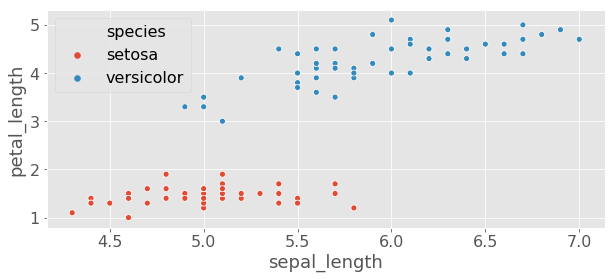

In [60]:
iris = sns.load_dataset('iris').iloc[:100] # drop virginica

X = iris.iloc[:, [0, 2]].values # keep petal_length and sepal_length
y = np.where(iris.species=='setosa', 1, -1) # convert to 1, -1

sns.scatterplot(iris.sepal_length, iris.petal_length, hue=iris.species)

## Working with the perceptron (2)
*How do we fit the perceptron model?* [perceptron definition](#Code-from-Raschka-2017)

In [61]:
# initialize the perceptron
clf = Perceptron(n_iter=10)

# fit the perceptron
# runs 10 iterations of updating the model
clf.fit(X, y)

## Working with the perceptron (3)
*How can we evaluate the model??*

Number of errors: 0


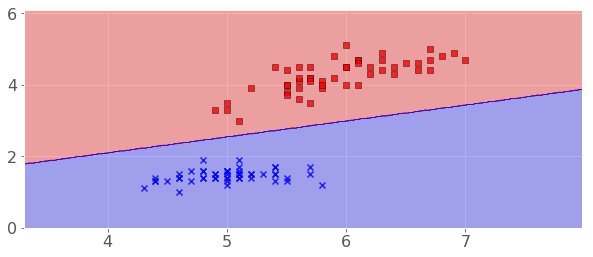

In [62]:
print('Number of errors: %i' % sum(clf.predict(X)!=y))

# we plot the decisions
plot_decision_regions(X,y,clf)

## Working with the perceptron (4)
*How does the model performance change??*

Text(0, 0.5, 'Number of errors')

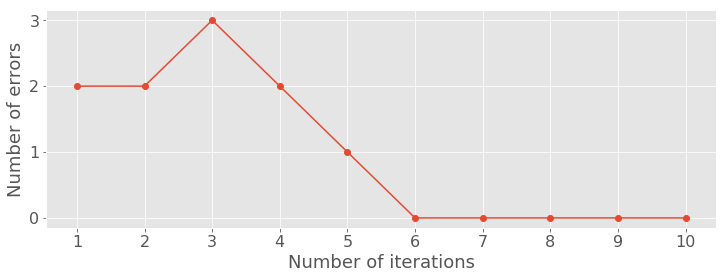

In [63]:
f,ax = plt.subplots(figsize=(12, 4))
ax.set_xticks(range(11))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_, marker='o')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Number of errors')

# Model validation

## Model validation
*How can we see how our model generalizes?*

We can simulate out-of-sample prediction. How?



- Idea: Use some of our sample for model evaluation.
- Implementation - divide data randomly into two subsets:
    - `training data` for estimation; 
    - `test data` for evaluation.
- Note: does not work for time series.



## Model validation (2)
We revert to titanic, `y`: survived, `X`: everything else

In [ ]:
print(titanic_sub.head(3))

We split the data into test and training samples

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# Beyond the perceptron

## Motivation
*What might we change about the perceptron?*

1. Change from updating errors that are binary to continuous
2. Use more than one observation a time for updating

## The activation function (1)
*What else might we use to update errors?*

- The most simple is **no transformation** of the net-input, i.e. $\phi(z_i)=z_i$.

- When we change this from perceptron we call it Adaptive Linear Neuron (**Adaline**).

## The activation function (2)
*How is this different from the Perceptron?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_09.png' alt="Drawing" style="width: 600px;"/></center>


## The activation function (3)
*Which activation functions can be used?*

- Linear 
- Logistic (Sigmoid)
- Unit step, sign

See page 450 in Python for Machine Learning.

## The activation function (4)
*How do Adaline and Logistic regression differ?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch03/images/03_03.png' alt="Drawing" style="width: 600px;"/></center>


## A new objective (1)
*The update rule in perceptron seems ad hoc, is there a more general way?*

- Yes, we minimize the sum of squared errors (SSE). The SSE for Adaline is:
\begin{align}SSE&=\boldsymbol{e}^{T}\boldsymbol{e}=e_1^2+..+e_n^2\\\boldsymbol{e}&=\textbf{y}-\textbf{X}\textbf{w}\end{align}

*Doesn't the above look strangely familiar?*

- Yes, it is the same objective as OLS. The difference:
    - OLS computes the exact solution with system of equations from first order conditions.
    - We make an approximate solution.

## A new objective (2)
*So how the hell do we make the approximate solution?*

- Two general classes:
  -  We approximate the first order derivative ~ gradient descent (GD)
  -  We approximate both first and second order derivative ~ quasi Newton    
 <br />
- We take gradient descent - much simpler (often faster)

## A new objective (3)
*How does a gradient descent look?*

An algorithm that finds the direction where expected differences are largest. Attempt of satisfying first order condition (FOC).

<center><img src='https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png' alt="Drawing" style="width: 350px;"/></center>


## A new objective (4)
*What is the first order derivative of SSE wrt. weights in Adaline?*

\begin{align}\frac{\partial SSE}{\partial w}=\textbf{X}^T\textbf{e},\end{align}


*How do we update with GD in Adaline?*

  - Idea: take small steps to approximate the solution.

  - $\Delta w=\eta\textbf{X}^T\textbf{e}=\eta\cdot\textbf{X}^T(\textbf{y}-\hat{\textbf{y}})$

## A new objective (5)
The gradient descent algorithm we just learned uses the whole data.

- Often known as batch gradient descent.

*What might be a smart way of changing (batch) gradient descent?*

- We only use a subset of the data. Two variants:
    - *stochastic gradient descent* (SGD): uses random subset of observations
    - *mini batch*: uses deterministic subset of observations (loop whole dataset)
    
- Idea: we converge faster by computing update for subset of data
    - Note: we may need a million repetitions.

## Applying logistic regression
*How difficult is it to use `LogisticRegression`?*

Very easy:

In [23]:
from sklearn.linear_model import LogisticRegression

# estimate model on train data, evaluate on test data
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train) # model training
y_hat = clf.predict(X_test)
accuracy = (y_hat==y_test).mean() # model testing
print('Model accuracy is:', np.round(accuracy,3))

Model accuracy is: 0.793


# The end
[Return to agenda](#Agenda)

# Code for plots

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Population plots

In [ ]:
%run pop_plots.ipynb

### Plots of ML types

In [ ]:
%run ../ML_plots.ipynb

### Plots from book

In [ ]:
import requests
import os
base_url = 'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch02/'

for filename in ('ch02.py', 'iris.data', 'iris.names.txt'):
    if not os.path.exists(filename):
        response = requests.get(base_url+filename)
        with open(filename,'wb') as f:
            f.write(response.text.encode('utf-8'))
    
from ch02 import Perceptron, AdalineGD, AdalineSGD, plot_decision_regions